# Softmax Regression 1D 2Class - Numpy

## Load dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

iris = np.genfromtxt('dataset/iris_1D_2c.csv', dtype =None, delimiter=',', skip_header=1)
X=iris[:,0:1]
y=iris[:, 1]

# change data type 

y= y.astype('uint8')
print('X:\n',X)
print('y:\n',y)



X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


## Visulization data

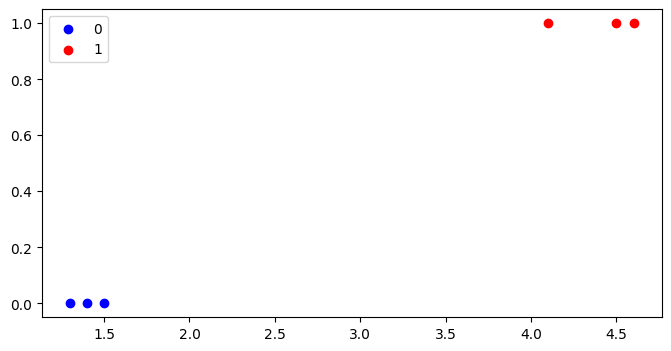

In [2]:
plt.figure(figsize=(8,4))
plt.scatter(X[y == 0 ][:,0] , y[y == 0],color='b' , label='0')
plt.scatter(X[y == 1 ][:,0] , y[y == 1],color='r' , label='1')

plt.legend()
plt.show()

## One Hot Encodeding

In [7]:

def convert_one_hot(y,k): #k là số class
    one_hot = np.zeros((len(y),k)) # set up numArray zero
    one_hot[np.arange(len(y)),y] = 1 # gán cho những vi trí của y bằng 1 ví dụ y có class là 1 thì vị trí 1 bằng 0 
    return one_hot
y_one_hot = convert_one_hot(y, len(np.unique(y)))
print(y_one_hot)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Simple Illustration - Summary

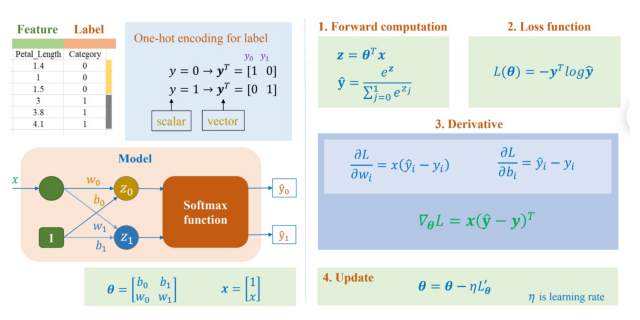

In [10]:
import matplotlib.pyplot as plt

# Load the image
image = plt.imread('.\images\SoftmaxRegression-Summary.jpg')

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

# Softmax Regression Vectorization in numpy 

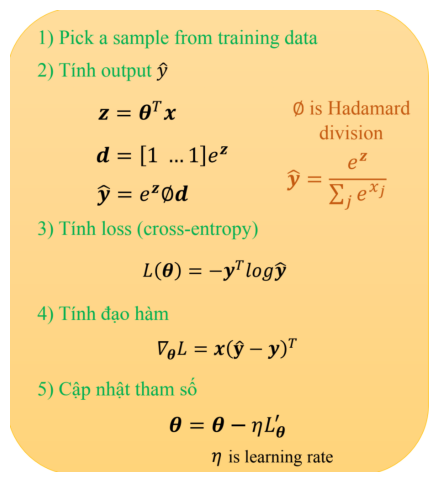

In [9]:
import matplotlib.pyplot as plt

# Load the image
image = plt.imread('.\images\SoftmaxRegession-vectorization.jpg')

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

In [19]:
# some parameter
learning_rate = 0.1 
losses = []
max_epoch = 100 
w = np.array([[0.2], [-0.1]])
b = np.array([[0.1], [ 0.05]])
N = 6
for epoch in range(max_epoch):
    for i in range(N):
        # 1. Forward computation
        xi = X[i]
        yi = y_one_hot[i]
        yi = yi.reshape(len(np.unique(y)),1) 
        # tính z 
        z = xi*w +b 
        # tính y mũ 
        exp_z = np.exp(z) # e mũ z
        y_hat = exp_z / np.sum(exp_z, axis=0)
        # 2. Tính loss 

        loss = -np.log(yi.T.dot(y_hat))
        losses.append(loss[0])

        # 3. Tính đạo hàm theo  (W,b)
        dw = (y_hat - yi)*xi
        db = y_hat - yi
        # 4. Update
        w += -learning_rate * dw
        b += -learning_rate * db
        

In [12]:
print(w)
print(b)

[[ 0.25384627]
 [-0.15384627]]
[[0.13846162]
 [0.01153838]]


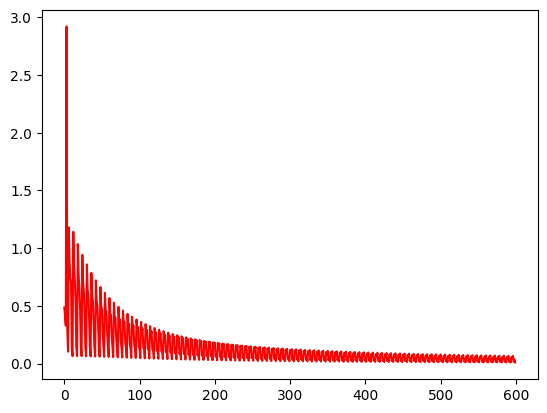

In [20]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

# Softmax Regression 2D 3Class batch  - Numpy

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

iris = np.genfromtxt('dataset/iris_2D_3c.csv', dtype =None, delimiter=',', skip_header=1)
X=iris[:,0:2]
y=iris[:, -1]

# change data type 

y= y.astype('uint8')
print('X:\n',X)
print('y:\n',y)



X:
 [[1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [4.7 1.6]
 [3.3 1.1]
 [4.6 1.3]
 [5.6 2.2]
 [5.1 1.5]
 [5.6 1.4]]
y:
 [0 0 0 1 1 1 2 2 2]


In [26]:
y_one_hot = convert_one_hot(y, len(np.unique(y)))
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print(X)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.6 0.2]
 [1.  4.7 1.6]
 [1.  3.3 1.1]
 [1.  4.6 1.3]
 [1.  5.6 2.2]
 [1.  5.1 1.5]
 [1.  5.6 1.4]]


In [28]:
# some parameters
N = 9
d = 3 # dimensionality
k = 3 # number of classes
theta = 0.01 * np.random.randn(d, k)
learning_rate = 0.01
losses = []
num_iter = 3000

for epoch in range(num_iter):
    # 1. Forward computation
    z = X.dot(theta)    

    # tính y mũ 
    exp_z = np.exp(z)    
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

     # 2. Tính loss 
    loss = -np.log(np.sum(y_hat*y_one_hot, axis=1))
    losses.append(np.sum(loss))

    # 3. Tính đạo hàm theo theta (W,b)
    dz = y_hat - y_one_hot  
    dtheta = X.T.dot(dz)

     # 4. Update
    theta = theta - learning_rate*dtheta
    
      

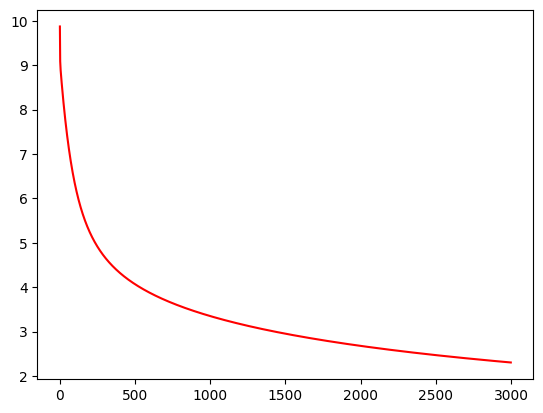

In [29]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()